This file illustrates the effect of a non-convex feasible region in a variation of the WYNDOR Glass Company example given in _Hillier and Lieberman_, Section 13.2.

We use the Ipopt solver backend which can handle nonlinear constraints and nonlinear objective functions.

In [48]:
from pyomo.environ import *
from pyomo.opt import *
opt = solvers.SolverFactory("ipopt")
model = ConcreteModel()

For non-convex problems such as this, there may be several local optima and the solver may return a local optimum which is not a global optimum. The solution which gets returned depends on the initial value.

For this problem, the default initialization happens to converge to the global maximum at $x=0$ and $y=7$.  However, other initial values result in convergence to the local maximum $x=4$ and $y=3$.

In the code below, we pass an explicit initial value for the search to each of the decision variables.

In [49]:
#### Example (1) ####
#model.x = Var(within=NonNegativeReals)
#model.y = Var(within=NonNegativeReals)

#model.c1 = Constraint(expr = model.x <= 4)
#model.c2 = Constraint(expr = 2*model.y <= 12)
#model.c3 = Constraint(expr = 9*model.x**2 + 5*model.y**2 <= 216)

#model.z = Objective(expr = 3*model.x + 5*model.y, sense=maximize)


#### Examples (2), (3) ####
#model.x = Var(within=NonNegativeReals)
#model.y = Var(within=NonNegativeReals)

#model.c1 = Constraint(expr = model.x <= 4)
#model.c2 = Constraint(expr = 2*model.y <= 12)
#model.c3 = Constraint(expr = 3*model.x + 2*model.y <= 18)

#model.z = Objective(expr = 126*model.x - 9*model.x**2 + 182*model.y - 13*model.y**2, sense=maximize)
##model.z = Objective(expr = 54*model.x - 9*model.x**2 + 78*model.y - 13*model.y**2, sense=maximize)


#### Example (4) ####
model.x = Var(within=NonNegativeReals, initialize=3)
model.y = Var(within=NonNegativeReals, initialize=2)

model.c1 = Constraint(expr = model.x <= 4)
model.c2 = Constraint(expr = 2*model.y <= 14)
model.c3 = Constraint(expr = 8*model.x - model.x**2 + 14*model.y - model.y**2 <= 49)

model.z = Objective(expr = 3*model.x + 5*model.y, sense=maximize)

In [50]:
results = opt.solve(model)

In [51]:
model.x.get_values()

{None: 4.000000039164761}

In [52]:
model.y.get_values()

{None: 3.000000060748778}

In [53]:
model.z.expr()

27.000000421238177

### Next a quick visualization of the feasible region for example (1):

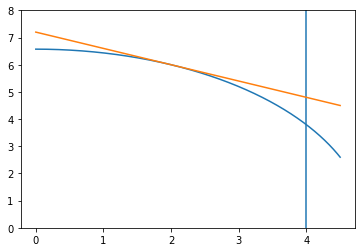

In [57]:
from pylab import *

def con2(x):
    return ((216-9*(x**2))/5)**(0.5)

def objective(x):
    return (36-3*x)/5

figure() # initialize figure
x = linspace(0,4.5,1000) # x values

axvline(4) # constraint (1)
plot(x,con2(x)) # new nonlinear constraint

plot(x,objective(x)) # onjective function

ylim(0,8)

show()